## Preprocessing

In [ ]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import CSV and create dataframe
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df2 = application_df.copy()
application_df2 = application_df2.drop(["NAME", "EIN"], axis=1)
application_df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
application_df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df2.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df2['APPLICATION_TYPE'] = application_df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
application_df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts < 700
application_df2['CLASSIFICATION'].value_counts().loc[application_df2['CLASSIFICATION'].value_counts() < 700].index

Index(['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150'],
      dtype='object')

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ["C1700", "C4000", "C5000", "C1270", "C2700", "C2800", "C7100", "C1300",
       "C1280", "C1230", "C1400", "C7200", "C2300", "C1240", "C8000", "C7120",
       "C1500", "C1800", "C6000", "C1250", "C8200", "C1238", "C1278", "C1235",
       "C1237", "C7210", "C2400", "C1720", "C4100", "C1257", "C1600", "C1260",
       "C2710", "C0", "C3200", "C1234", "C1246", "C1267", "C1256", "C2190",
       "C4200", "C2600", "C5200", "C1370", "C1248", "C6100", "C1820", "C1900",
       "C1236", "C3700", "C2570", "C1580", "C1245", "C2500", "C1570", "C1283",
       "C2380", "C1732", "C1728", "C2170", "C4120", "C8210", "C2561", "C4500",
       "C2150"]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df2['CLASSIFICATION'] = application_df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df2 = pd.get_dummies(application_df2)
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
x = application_df2.drop("IS_SUCCESSFUL", axis = 1)
y = application_df2.IS_SUCCESSFUL
# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)
print(x_train.shape)
print(x_test.shape)

(25724, 44)
(8575, 44)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model1 = tf.keras.models.Sequential()

nn_model1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(x.columns)))

# Add a second layer
nn_model1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 225       
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 247 (988.00 Byte)
Trainable params: 247 (988.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile the Sequential model together and customize metrics
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
fit_model = nn_model1.fit(x_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 4s 3ms/step - loss: 0.5489 - accuracy: 0.7322
Epoch 2/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7327
Epoch 3/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7332
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7331
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7326
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7329
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7326
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7328
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7326
Epoch 10/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5487 - accura

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model1.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5561 - accuracy: 0.7292 - 506ms/epoch - 2ms/step
Loss: 0.5561227798461914, Accuracy: 0.7292128205299377


In [32]:
# add in function created in class. Week 21 day 2 activity 2
def doClassification_NN1(nn_model1, x_train, x_test, y_train, y_test):
    # predict
    train_preds = nn_model1.predict(x_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model1.predict(x_train)

    test_preds = nn_model1.predict(x_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model1.predict(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8103  3942]
 [ 2884 10795]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.67      0.70     12045
           1       0.73      0.79      0.76     13679

    accuracy                           0.73     25724
   macro avg       0.74      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



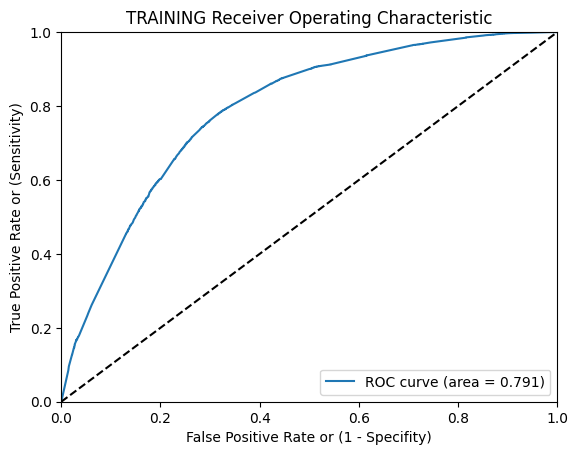



TESTING METRICS

    Test Confusion Matrix:
    [[2655 1338]
 [ 984 3598]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.66      0.70      3993
           1       0.73      0.79      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



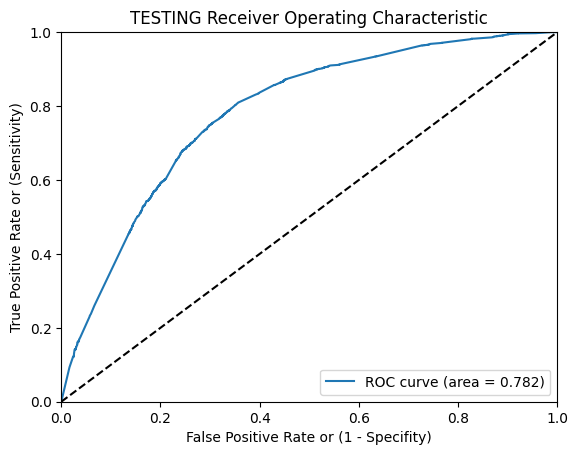

In [33]:
 doClassification_NN1(nn_model1, x_train_scaled, x_test_scaled, y_train, y_test)

In [39]:
# Export our model to HDF5 file
nn_model1.save("nn_model1.h5")

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(x.columns)))

# Add a second layer
nn_model2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add a third layer
nn_model2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                675       
                                                                 
 dense_7 (Dense)             (None, 7)                 112       
                                                                 
 dense_8 (Dense)             (None, 5)                 40        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
fit_model2 = nn_model2.fit(x_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 8s 4ms/step - loss: 0.6287 - accuracy: 0.6742
Epoch 2/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5643 - accuracy: 0.7262
Epoch 3/500
804/804 [==============================] - 5s 7ms/step - loss: 0.5572 - accuracy: 0.7271
Epoch 4/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5549 - accuracy: 0.7286
Epoch 5/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5523 - accuracy: 0.7283
Epoch 6/500
804/804 [==============================] - 6s 7ms/step - loss: 0.5507 - accuracy: 0.7301
Epoch 7/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5495 - accuracy: 0.7304
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7299
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7324
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accura

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5639 - accuracy: 0.7266 - 475ms/epoch - 2ms/step
Loss: 0.5639122128486633, Accuracy: 0.7266472578048706


In [40]:
# add in function created in class. Week 21 day 2 activity 2
def doClassification_NN2(nn_model2, x_train, x_test, y_train, y_test):
    # predict
    train_preds = nn_model2.predict(x_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model2.predict(x_train)

    test_preds = nn_model2.predict(x_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model2.predict(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8176  3869]
 [ 2816 10863]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.68      0.71     12045
           1       0.74      0.79      0.76     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



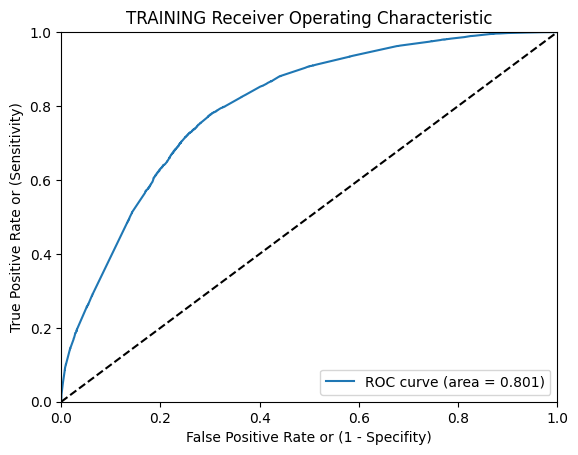



TESTING METRICS

    Test Confusion Matrix:
    [[2658 1335]
 [1009 3573]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      3993
           1       0.73      0.78      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    



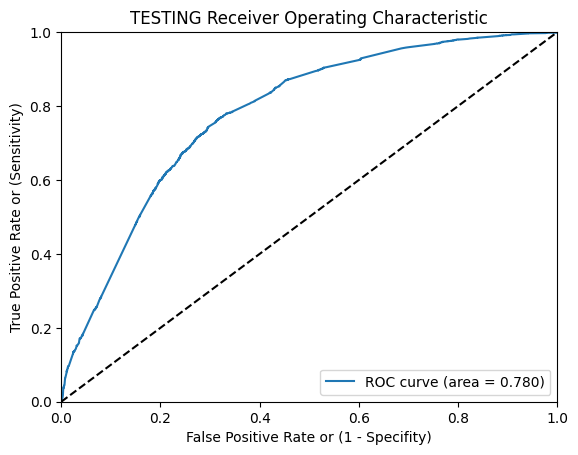

In [41]:
doClassification_NN2(nn_model2, x_train_scaled, x_test_scaled, y_train, y_test)

In [42]:
nn_model2.save("nn_model2.h5")

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model3 = tf.keras.models.Sequential()

nn_model3.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=len(x.columns)))

# Add a second layer
nn_model3.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Add a third layer
nn_model3.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                900       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1171 (4.57 KB)
Trainable params: 1171 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Compile the Sequential model together and customize metrics
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
fit_model3 = nn_model3.fit(x_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.5891 - accuracy: 0.7081
Epoch 2/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5554 - accuracy: 0.7276
Epoch 3/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5521 - accuracy: 0.7288
Epoch 4/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7292
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7298
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7296
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7303
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7320
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7304
Epoch 10/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5458 - accura

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5597 - accuracy: 0.7304 - 704ms/epoch - 3ms/step
Loss: 0.5597202777862549, Accuracy: 0.7303789854049683


In [46]:
# add in function created in class. Week 21 day 2 activity 2
def doClassification_NN3(nn_model3, x_train, x_test, y_train, y_test):
    # predict
    train_preds = nn_model3.predict(x_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model3.predict(x_train)

    test_preds = nn_model3.predict(x_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model3.predict(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 7999  4046]
 [ 2606 11073]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.66      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



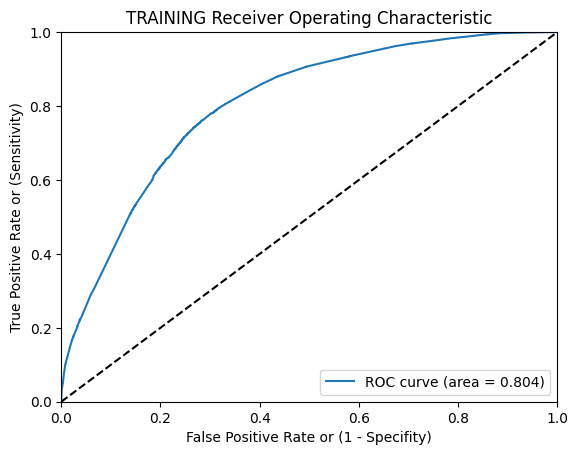



TESTING METRICS

    Test Confusion Matrix:
    [[2597 1396]
 [ 916 3666]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69      3993
           1       0.72      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



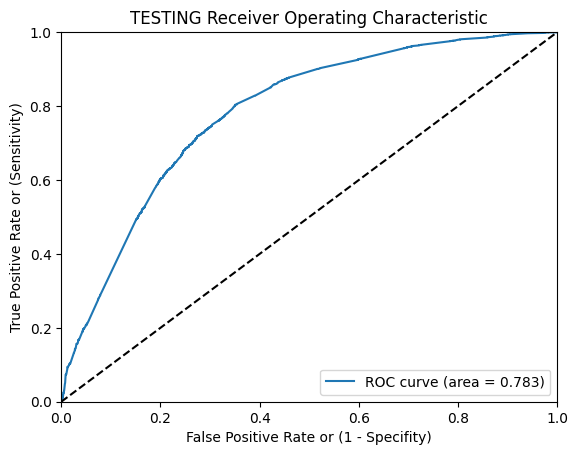

In [47]:
doClassification_NN3(nn_model3, x_train_scaled, x_test_scaled, y_train, y_test)

In [48]:
nn_model3.save("nn_model3.h5")

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model4 = tf.keras.models.Sequential()

nn_model4.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=len(x.columns)))

# Add a second layer
nn_model4.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Add a third layer
nn_model4.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add a fourth layer
nn_model4.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                900       
                                                                 
 dense_15 (Dense)            (None, 15)                315       
                                                                 
 dense_16 (Dense)            (None, 7)                 112       
                                                                 
 dense_17 (Dense)            (None, 3)                 24        
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1355 (5.29 KB)
Trainable params: 1355 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compile the Sequential model together and customize metrics
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
fit_model4 = nn_model4.fit(x_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 4s 3ms/step - loss: 0.6278 - accuracy: 0.6859
Epoch 2/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5868 - accuracy: 0.7203
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5730 - accuracy: 0.7240
Epoch 4/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.7282
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5625 - accuracy: 0.7282
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7309
Epoch 7/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5589 - accuracy: 0.7288
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7303
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7304
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accura

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model4.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5597 - accuracy: 0.7314 - 477ms/epoch - 2ms/step
Loss: 0.5596939325332642, Accuracy: 0.7314285635948181


In [52]:
# add in function created in class. Week 21 day 2 activity 2
def doClassification_NN4(nn_model4, x_train, x_test, y_train, y_test):
    # predict
    train_preds = nn_model4.predict(x_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model4.predict(x_train)

    test_preds = nn_model4.predict(x_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model4.predict(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8011  4034]
 [ 2614 11065]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



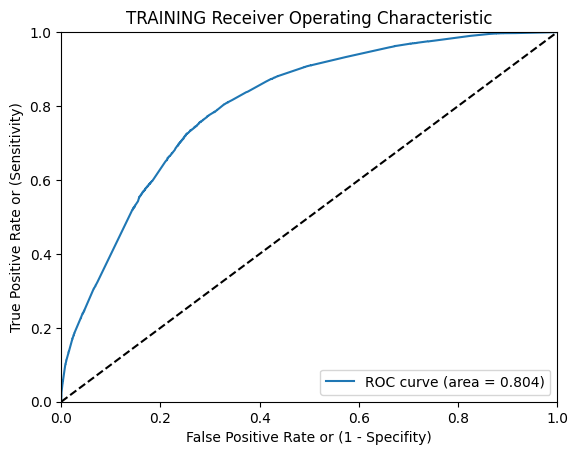



TESTING METRICS

    Test Confusion Matrix:
    [[2605 1388]
 [ 915 3667]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69      3993
           1       0.73      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



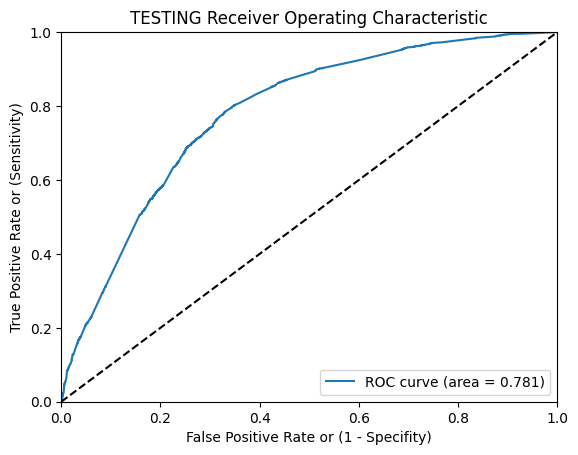

In [53]:
doClassification_NN4(nn_model4, x_train_scaled, x_test_scaled, y_train, y_test)

In [54]:
# save model
nn_model4.save("nn_model4.h5")

In [55]:
# add 2nd function from class. Week 20 day 2 activity 4
def doClassification5(model, x_train, x_test, y_train, y_test):
    # predict
    train_preds = model.predict(x_train)
    train_probs = model.predict_proba(x_train)

    test_preds = model.predict(x_test)
    test_probs = model.predict_proba(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix:
    [[ 9668  2377]
 [ 2357 11322]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.80      0.80      0.80     12045
           1       0.83      0.83      0.83     13679

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724

    



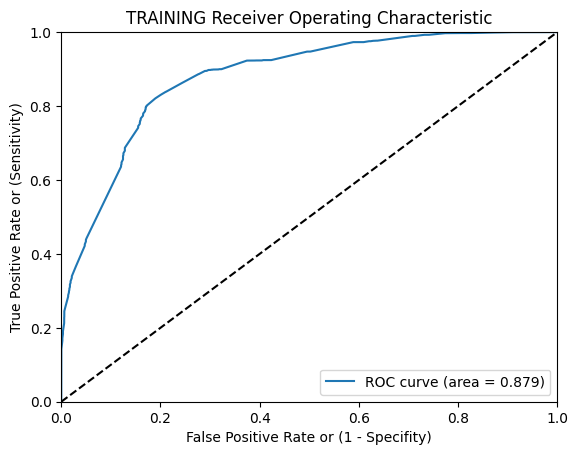



TESTING METRICS

    Test Confusion Matrix:
    [[2793 1200]
 [1235 3347]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.69      0.70      0.70      3993
           1       0.74      0.73      0.73      4582

    accuracy                           0.72      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.72      0.72      0.72      8575

    



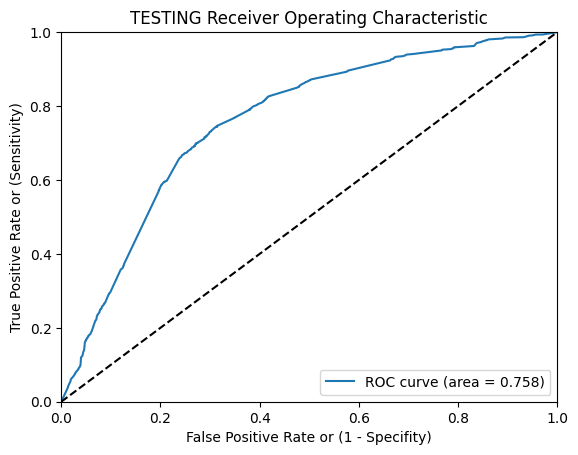

In [56]:
#add in random forest
# initialize
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(x_train_scaled, y_train)

doClassification5(rf, x_train_scaled, x_test_scaled, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8167  3878]
 [ 3281 10398]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.71      0.68      0.70     12045
           1       0.73      0.76      0.74     13679

    accuracy                           0.72     25724
   macro avg       0.72      0.72      0.72     25724
weighted avg       0.72      0.72      0.72     25724

    



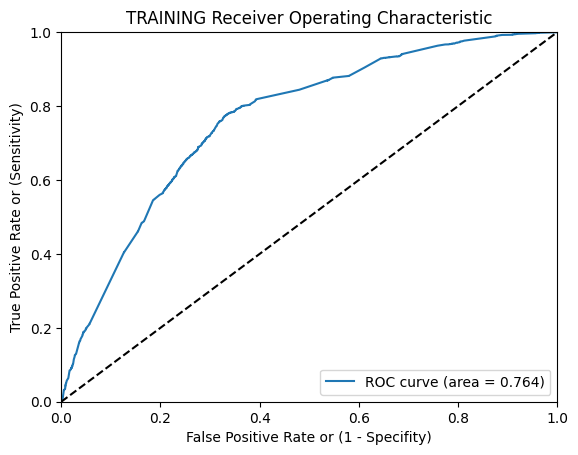



TESTING METRICS

    Test Confusion Matrix:
    [[2701 1292]
 [1102 3480]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.71      0.68      0.69      3993
           1       0.73      0.76      0.74      4582

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    



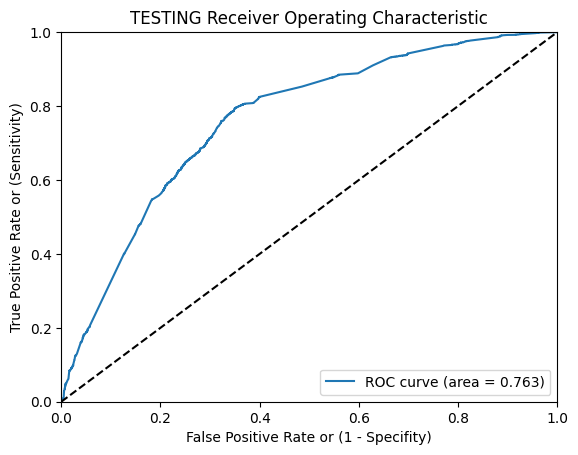

In [57]:
# add in Linear Regression to compare against other models
 # initialize
lr = LogisticRegression()

# fit
lr.fit(x_train_scaled, y_train)

doClassification5(lr, x_train_scaled, x_test_scaled, y_train, y_test)